In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
energias = pd.read_csv('energias_nao_pertubadas.txt', sep='=',names=['Total Energy', 'Valor']).drop(columns='Total Energy')
energias

,Valor
0,-361.19576756 Ry
1,-361.23038191 Ry
2,-361.26202131 Ry
3,-361.29094631 Ry
4,-361.31735431 Ry
...,...
395,-361.53411096 Ry
396,-361.52797083 Ry
397,-361.52176029 Ry
398,-361.51548108 Ry


In [25]:
energias["Valor"] = energias.iloc[:, 0].str.replace(" Ry", "", regex=True).astype(float)

In [26]:
energias

,Valor
0,-361.195768
1,-361.230382
2,-361.262021
3,-361.290946
4,-361.317354
...,...
395,-361.534111
396,-361.527971
397,-361.521760
398,-361.515481


In [27]:
# Valores únicos dos parâmetros de rede contidos nos arquivos
valores_a =  ! ls SCFs.out/ | cut -d'-' -f2 | sort -n | uniq
valores_ca = ! ls SCFs.out | cut -d'-' -f3 | cut -d'.' -f1,2 | sort -n | uniq

In [28]:
# Adicionar constantes de rede em duas casas decimais ao DataFrame
energias['celldm(1)'] = ! ls SCFs.out/ | cut -d'-' -f2 | sort -n 
energias['celldm(3)'] = ! ls SCFs.out/ | cut -d'-' -f3 | cut -d'.' -f1,2 | sort -n


In [29]:
# Mapear o nome do arquivo ao valor de energia no DataFrame
energias['file.in']= !ls SCFs.in/ -1 
energias['file.out']= !ls SCFs.out/ -1 

In [30]:
energias['Valor'].idxmin(), energias['Valor'].min()

(210, -361.6368879)

In [31]:
energias.loc[210]

Valor              -361.636888
celldm(1)                 6.18
celldm(3)                 1.61
file.in       scf-6.18-1.61.in
file.out     scf-6.18-1.61.out
Name: 210, dtype: object

__Cabeçalho do melhor script__

In [32]:
! head -n 12 SCFs.in/scf-6.18-1.61.in

&CONTROL
  calculation = 'scf',
  pseudo_dir = '/home/jvc/QEspresso7.2/ZnO_database/pseudos',
  outdir='./',
  prefix = 'ZnO_ANN',
  tstress=.true.,
  tprnfor=.true.,
/
&SYSTEM
  ibrav= 4,
  celldm(1) = 6.178821408099,
  celldm(3) = 1.614358356153,


In [33]:
# otimal values
celldm1_vcrelax = 6.178_821_408_099_141
celldm3_vcrelax = 1.614_358_356_153_010

print('Diferença celldm(1)', abs(celldm1_vcrelax - 6.178_821_408_099))
print('Diferença celldm(3)', abs(celldm3_vcrelax - 1.614_358_356_153))

Diferença celldm(1) 1.412203687323199e-13
Diferença celldm(3) 9.992007221626409e-15


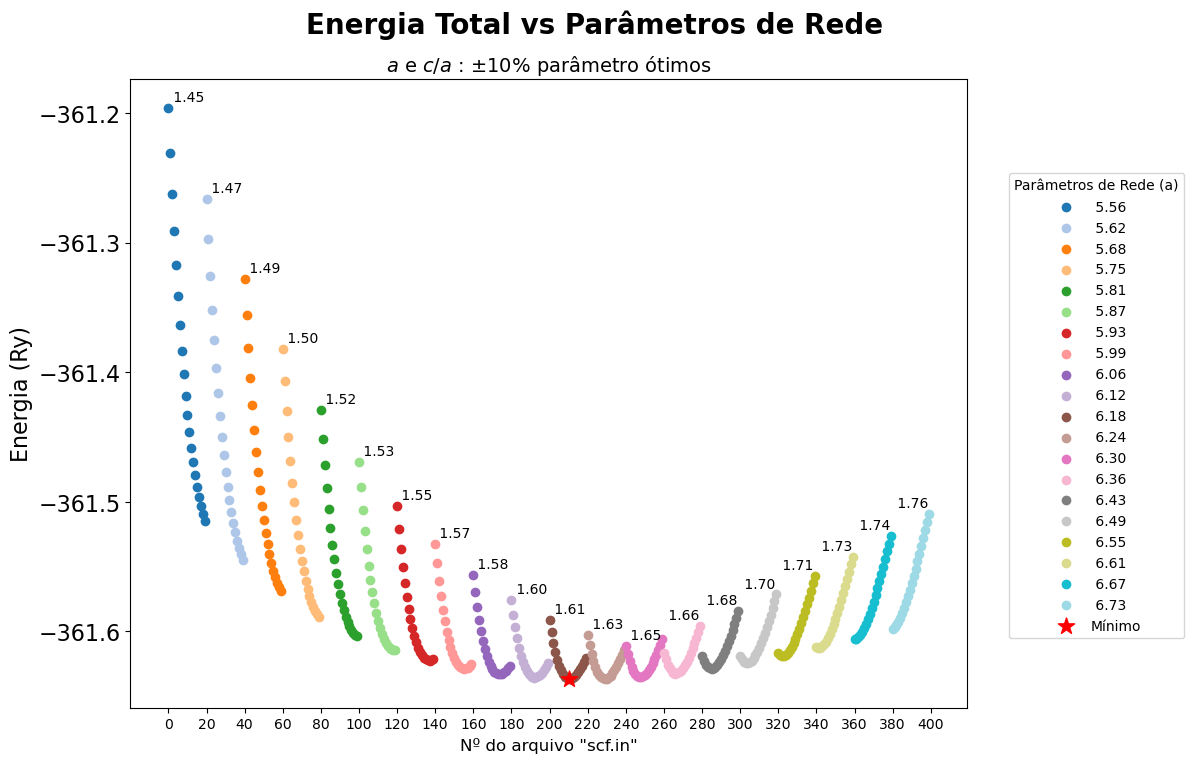

In [34]:
fig, ax = plt.subplots(figsize=(12, 8))
fig.suptitle('Energia Total vs Parâmetros de Rede', fontsize=20, fontweight='bold')
plt.subplots_adjust(bottom=0.3, right=0.75)

# Definir paleta de cores
cores = plt.cm.tab20.colors  # 20 cores distintas

# Plotar os pontos em grupos de 20
for i in range(0, energias.shape[0], 20):
   
    ax.scatter(
        x=range(i, min(i + 20, energias.size)),
        y=energias['Valor'].iloc[i : i + 20],
        color=cores[(i // 20) % len(cores)],
        marker='o',
        label = f' {valores_a[i//20]} '
    )

   #Escreve o valor de c/a próximo ao primeiro ponto de cada grupo
    ax.text(
    x = i+ 0.05,
    y= energias['Valor'].iloc[i] + 0.005 if i <= 240 else energias['Valor'].iloc[i+19] + 0.005,
    s = f' {valores_ca[i//20]} '
)

# Marcar o menor valor com estrela vermelha
ax.scatter(
    x=energias['Valor'].idxmin(),
    y=energias['Valor'].min(),
    color='red',
    marker='*',
    s=150,
    label='Mínimo'
)

ax.set_xticks([i for i in range(0,420,20)])
ax.tick_params(axis='y', labelsize=16)
ax.set_title('${a}$ e ${c/a}$ : $\\pm$10% parâmetro ótimos', fontsize=14)
ax.set_xlabel('Nº do arquivo "scf.in"', fontsize=12)
ax.set_ylabel('Energia (Ry)', fontsize=16)
ax.legend(bbox_to_anchor=(1.05, 0.85), loc='upper left', borderaxespad=0., title='Parâmetros de Rede (a)') # Ajusta a posição da legend
plt.tight_layout()
plt.show()

In [54]:
import matplotlib.style as style

style.available[-2:]

['seaborn-v0_8-whitegrid', 'tableau-colorblind10']

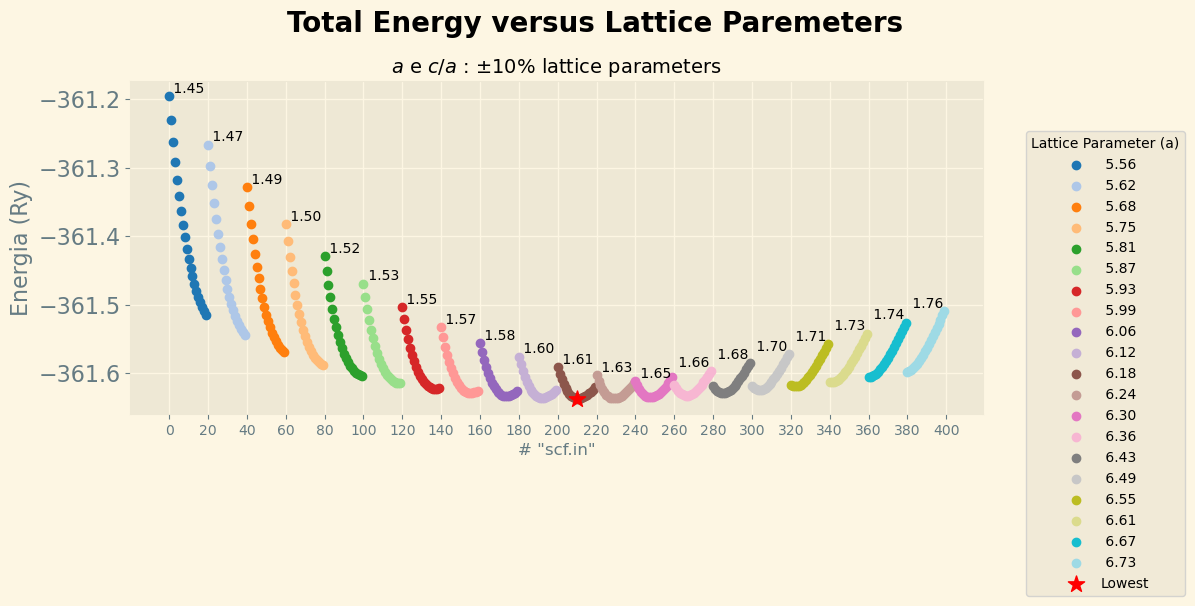

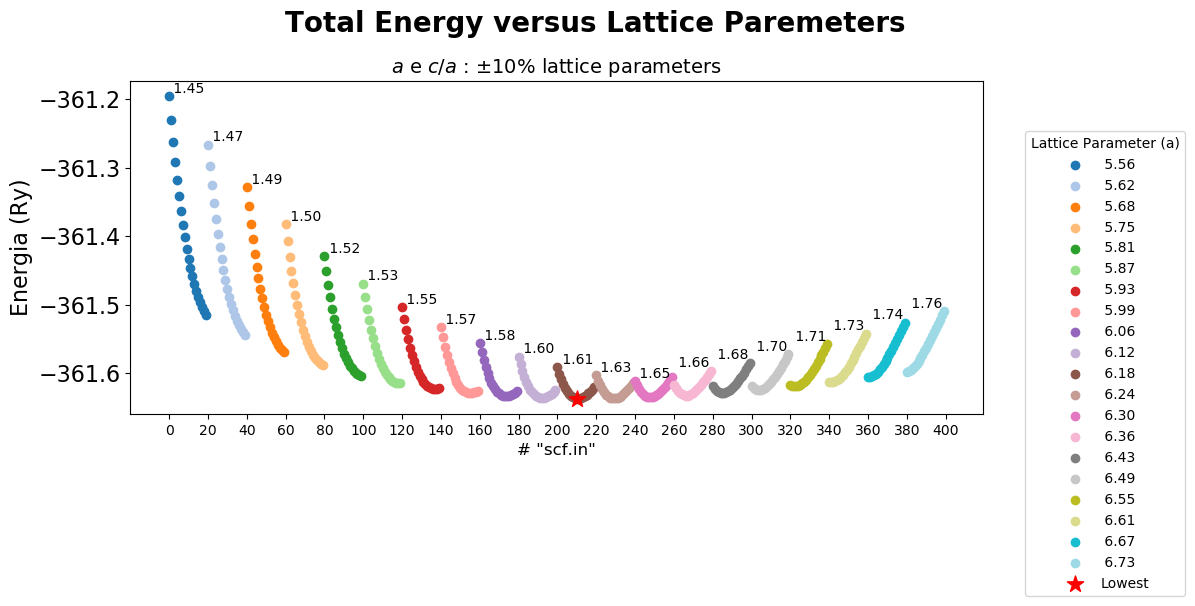

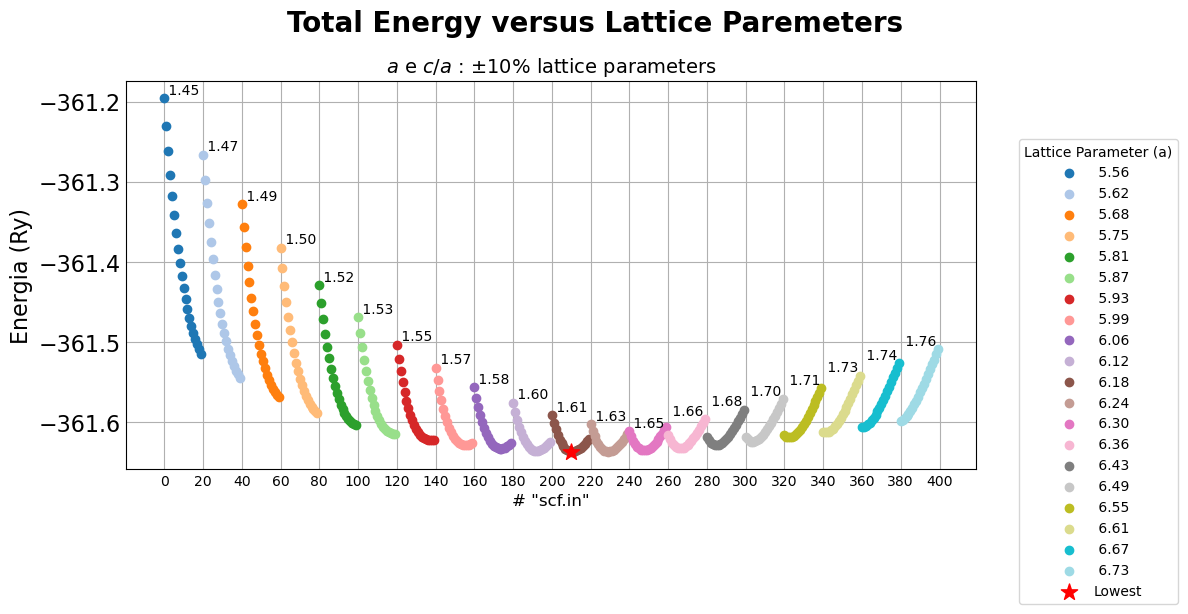

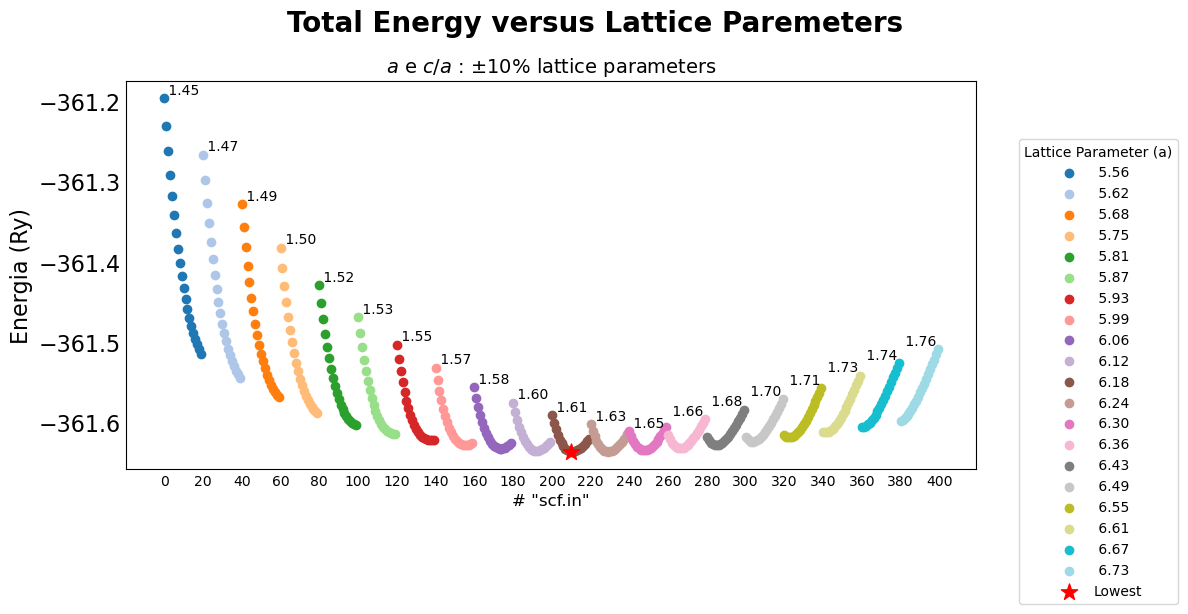

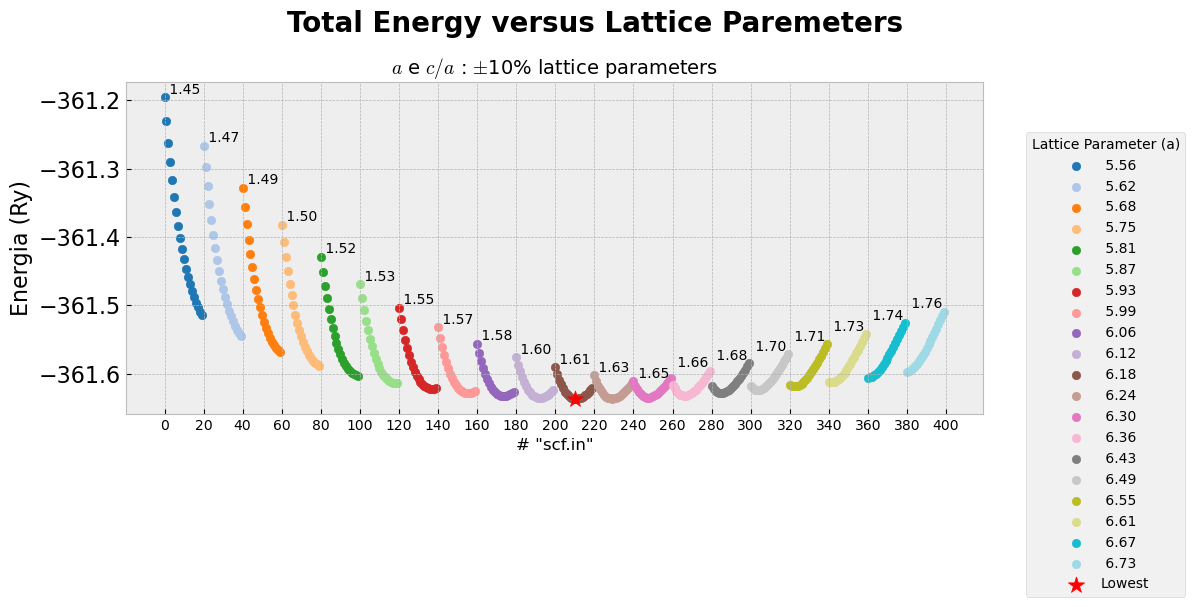

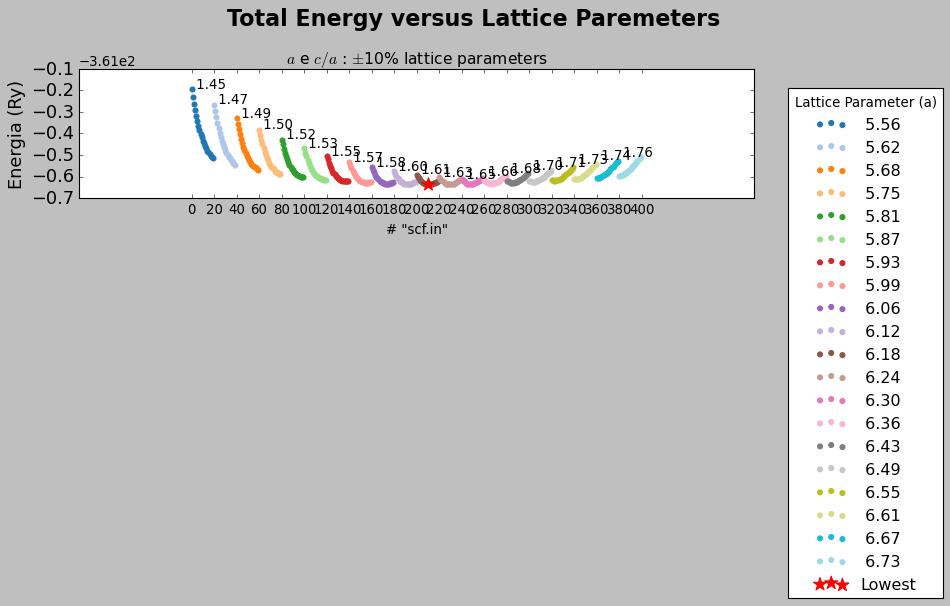

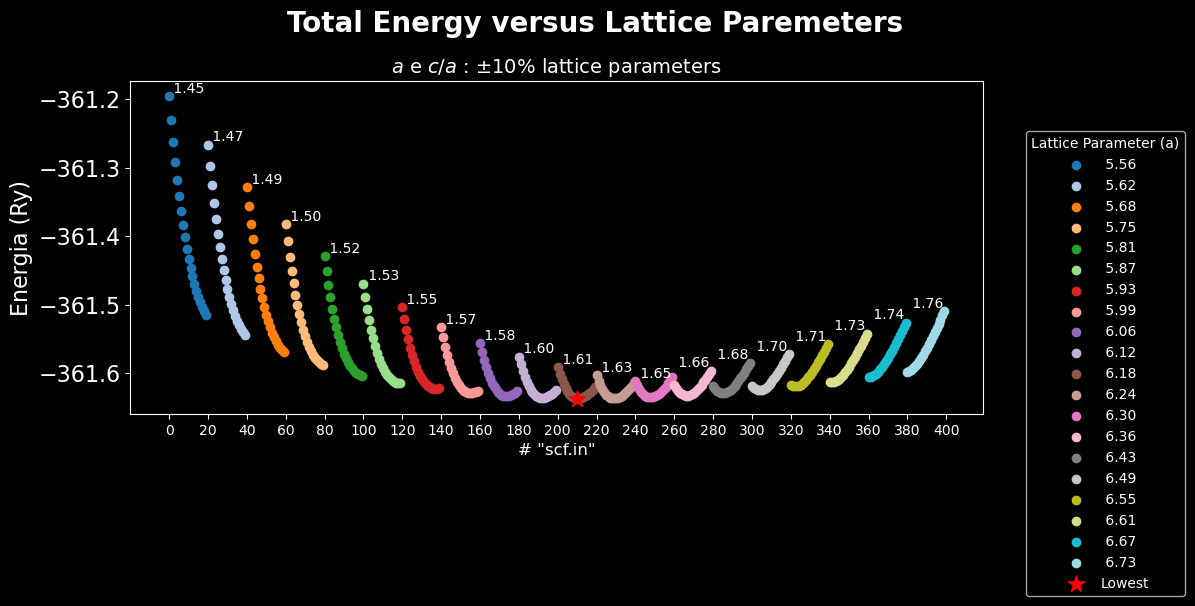

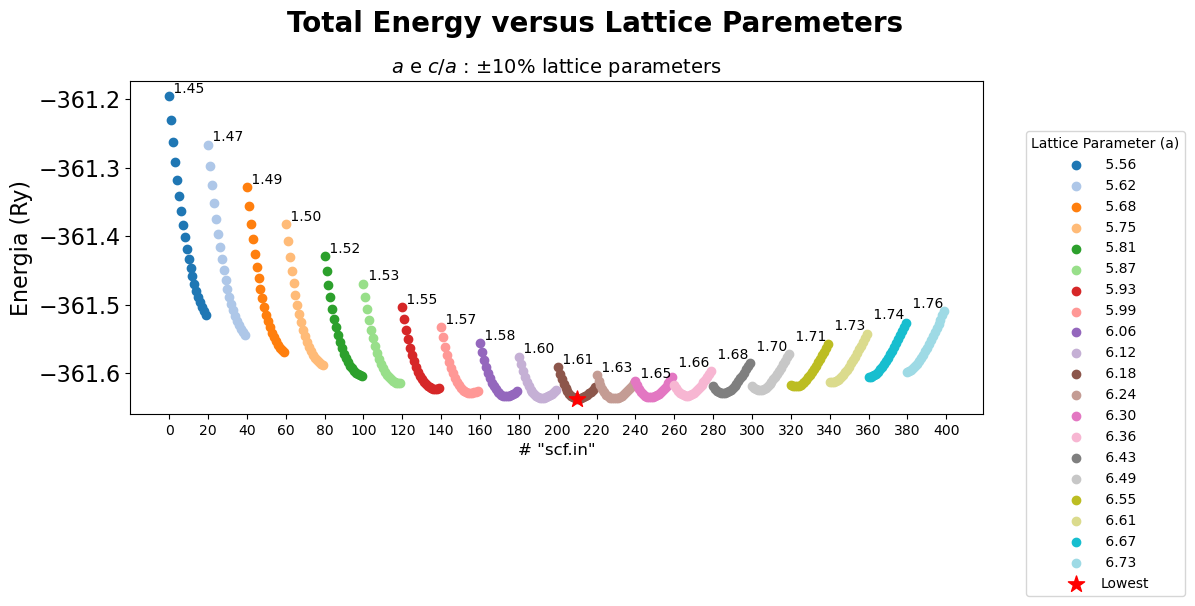

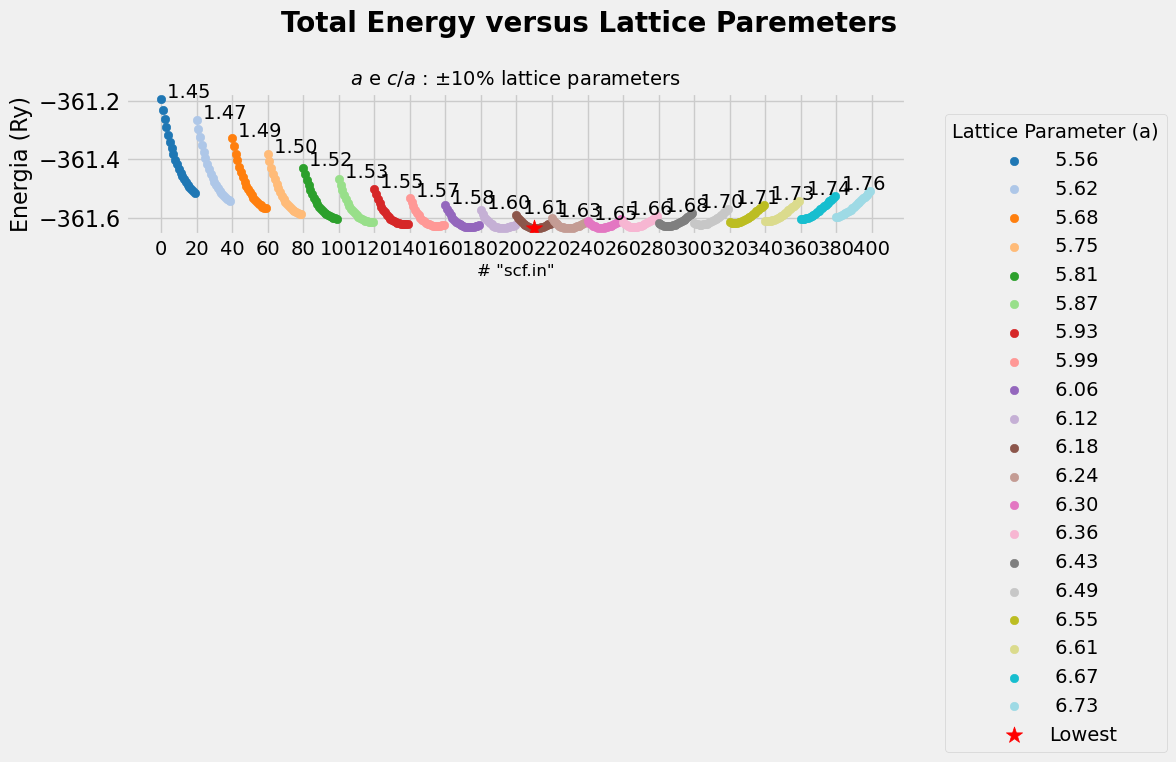

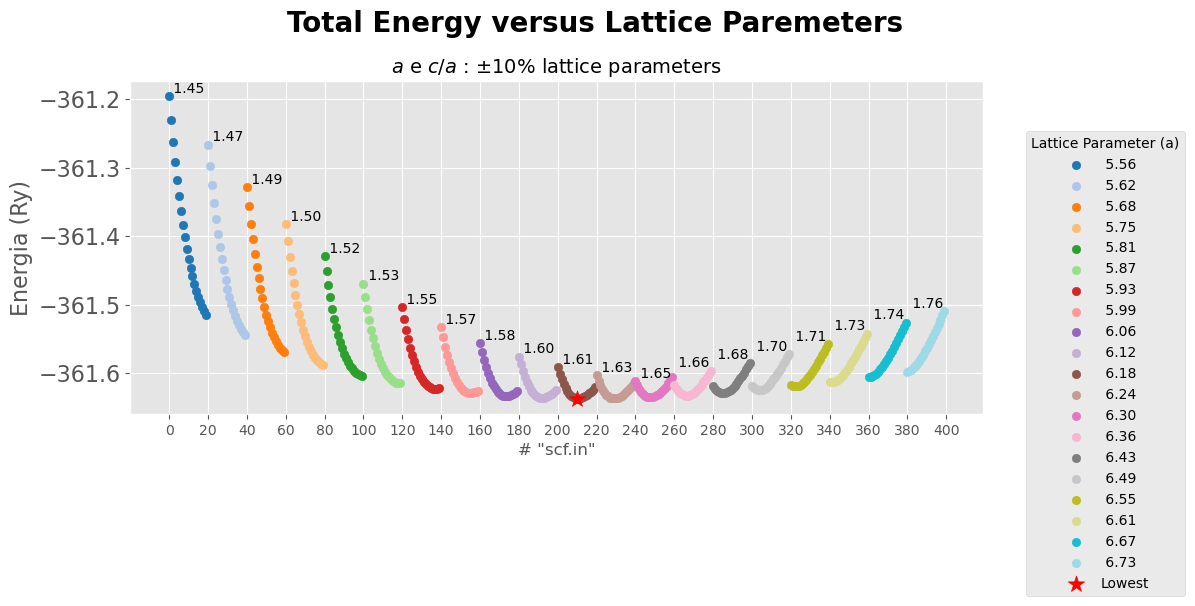

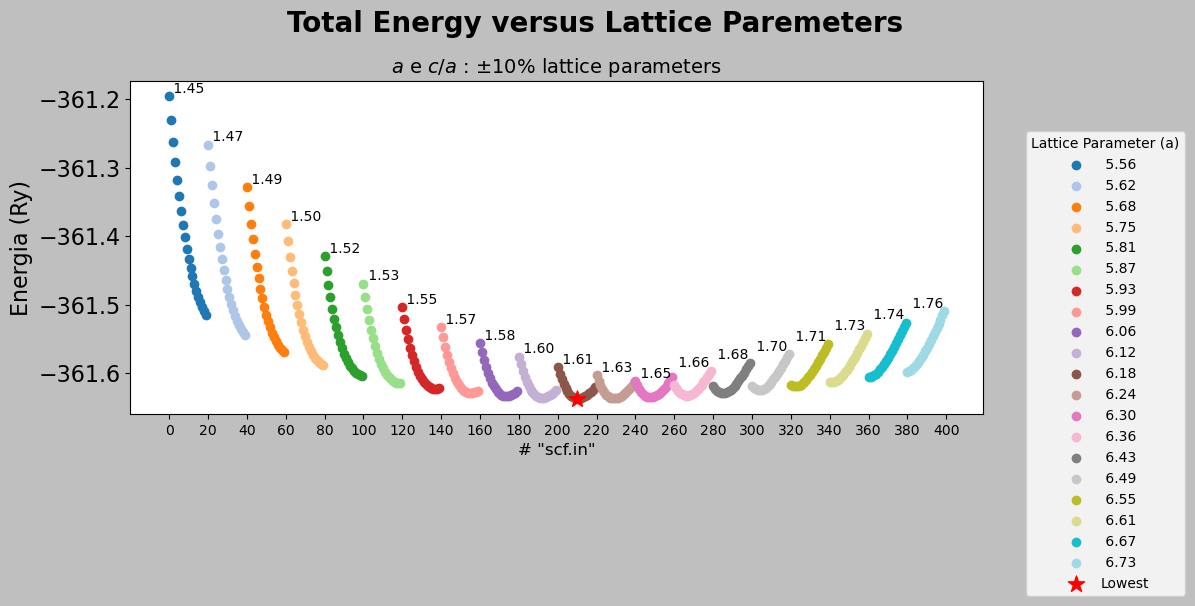

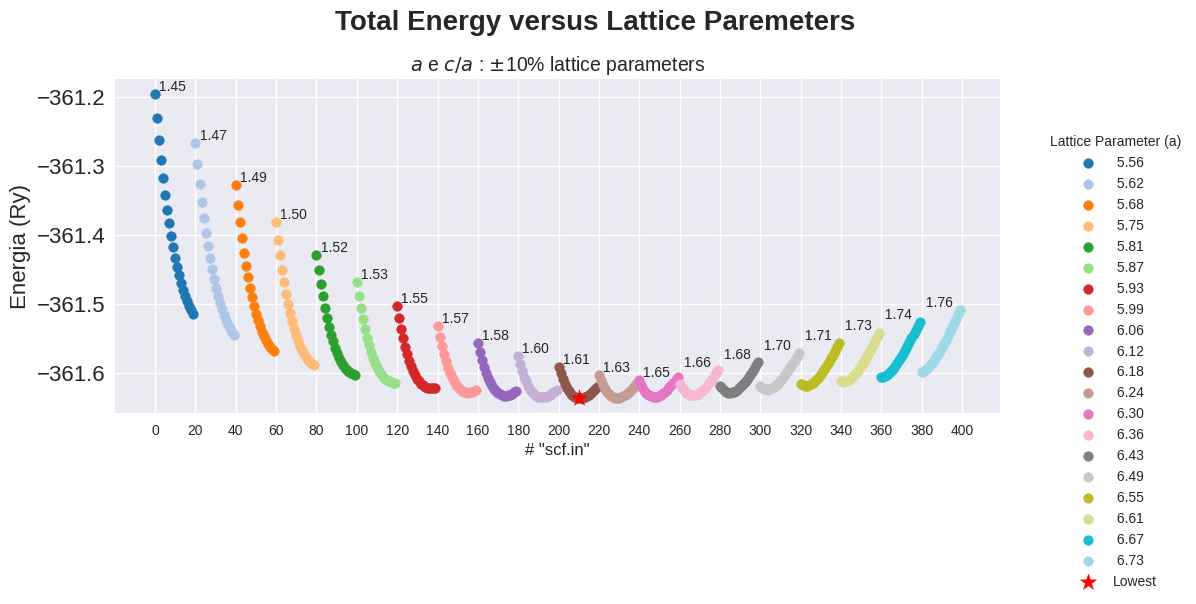

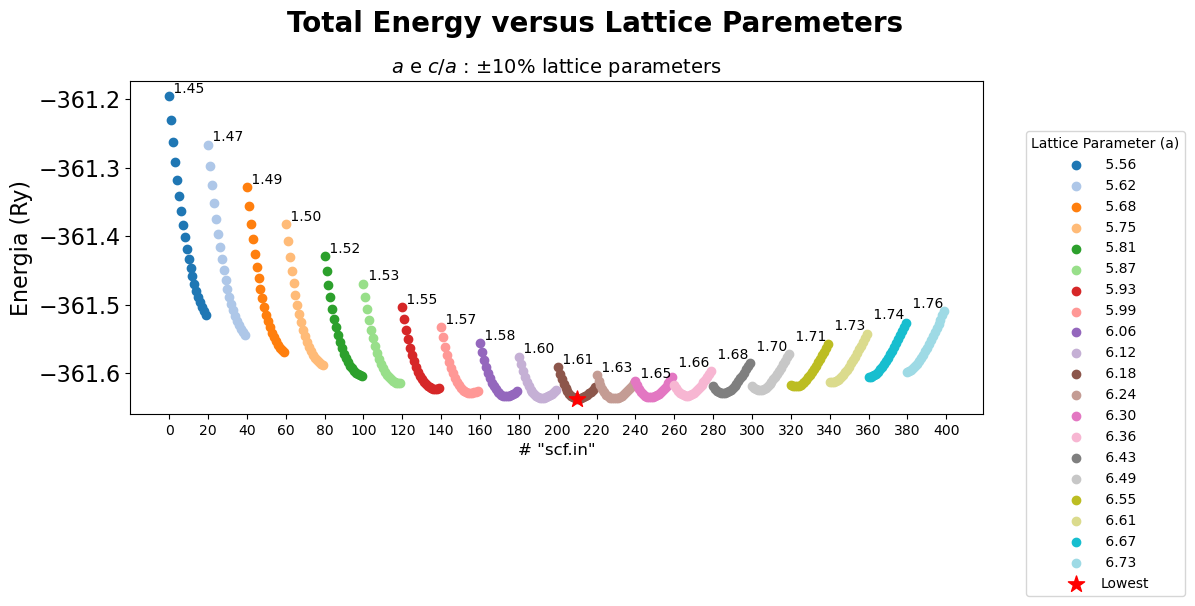

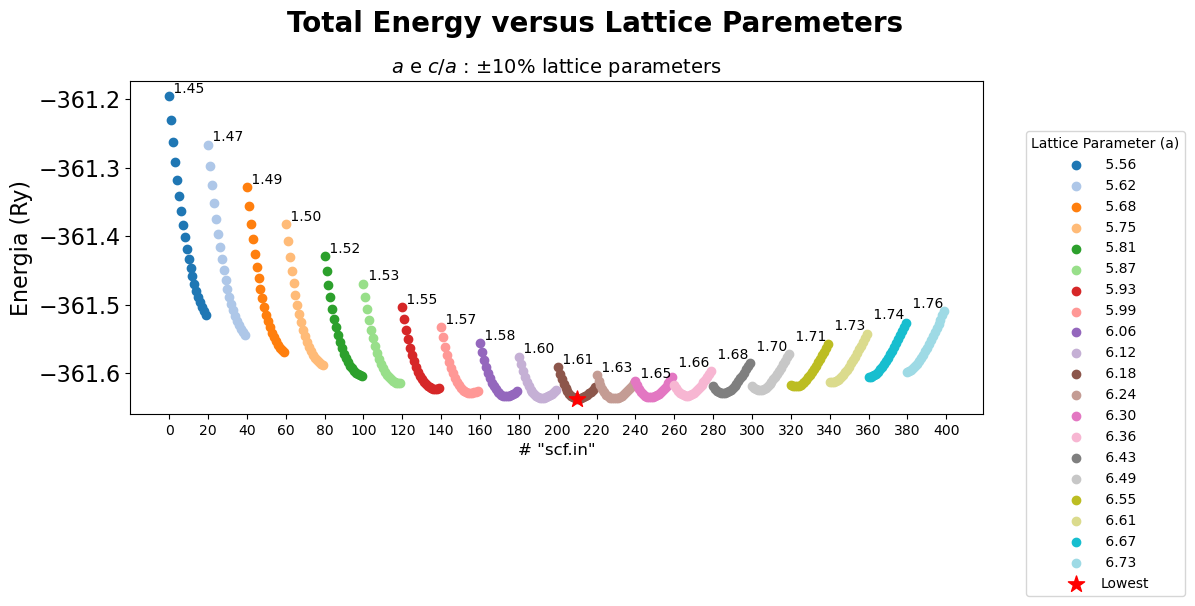

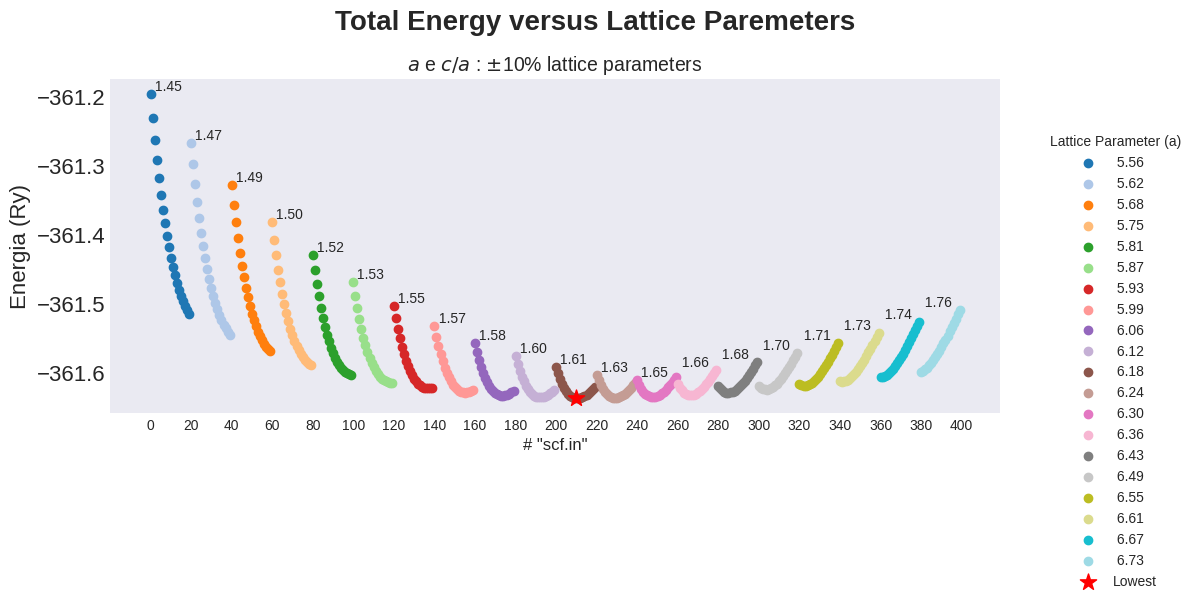

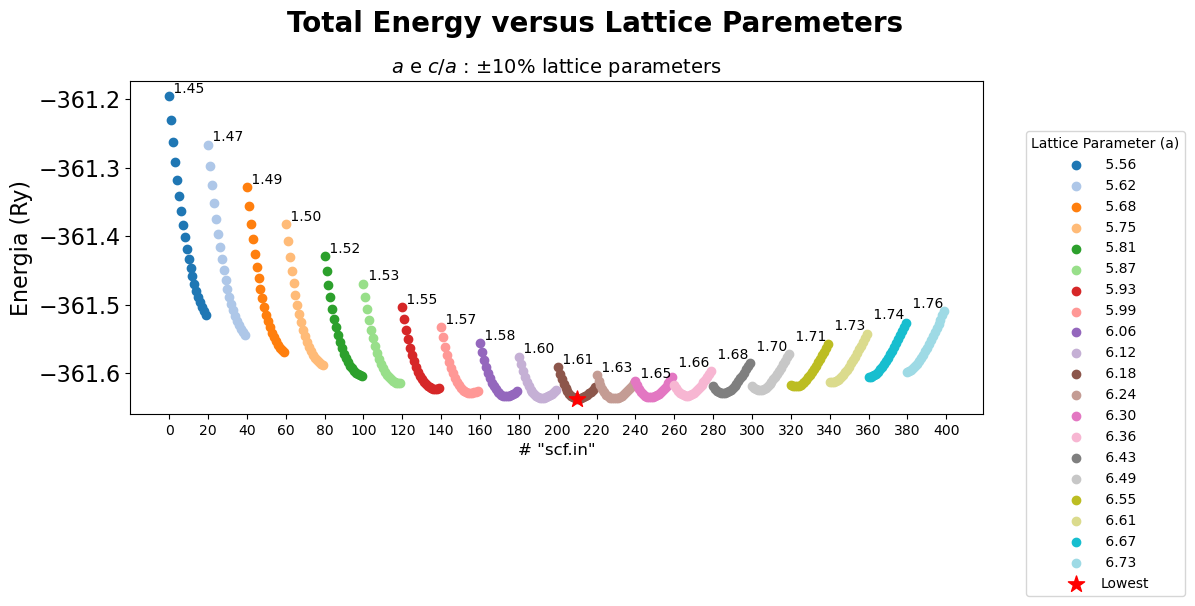

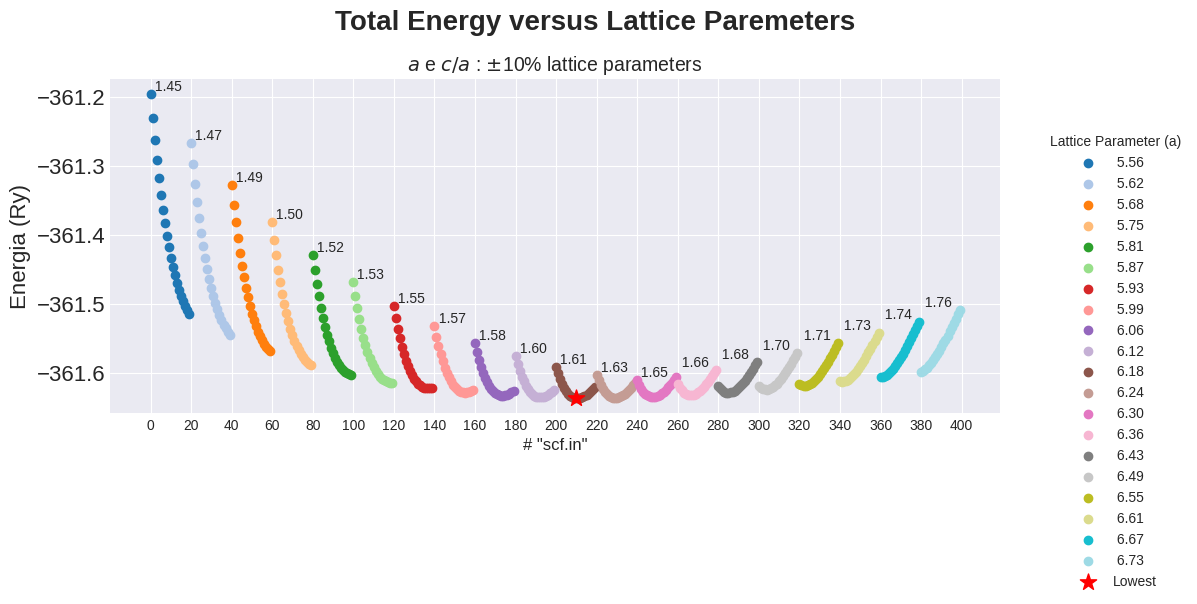

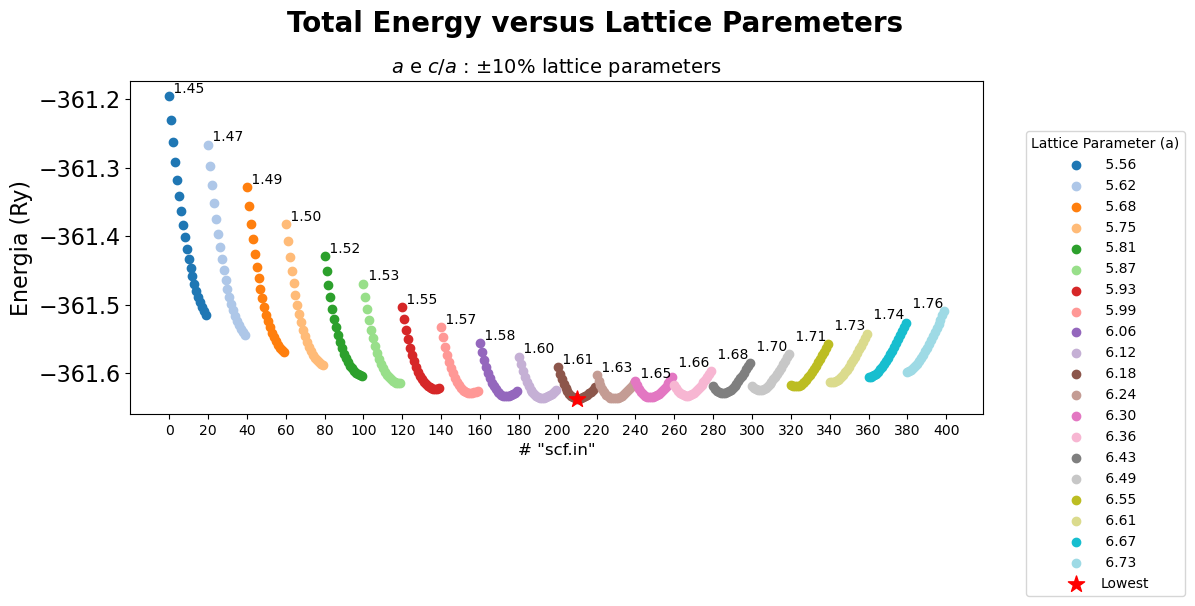

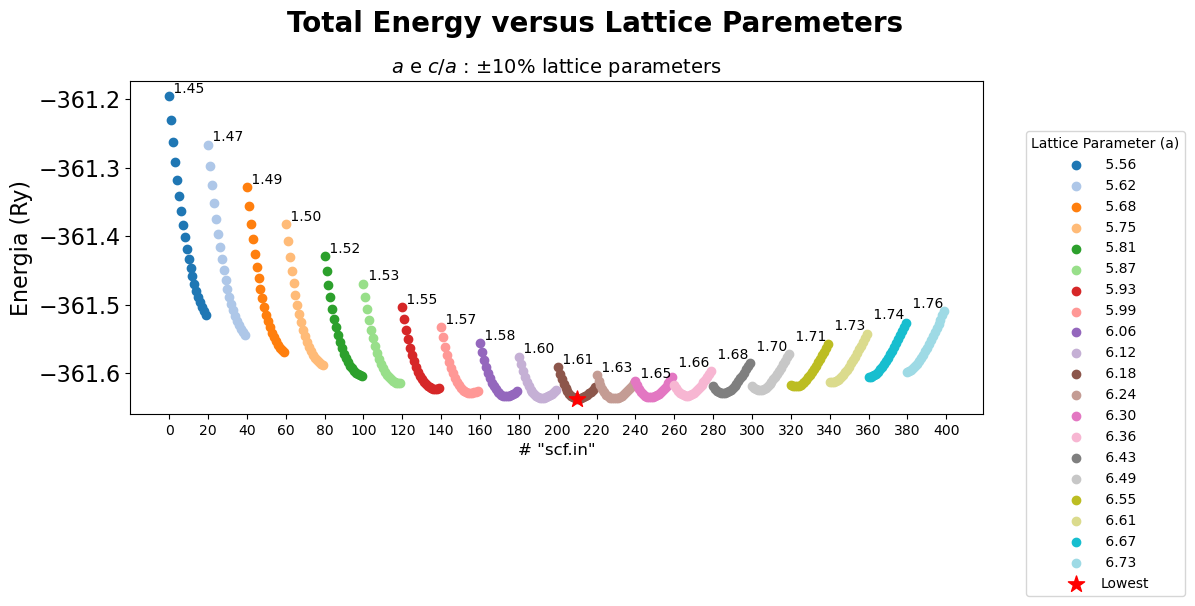

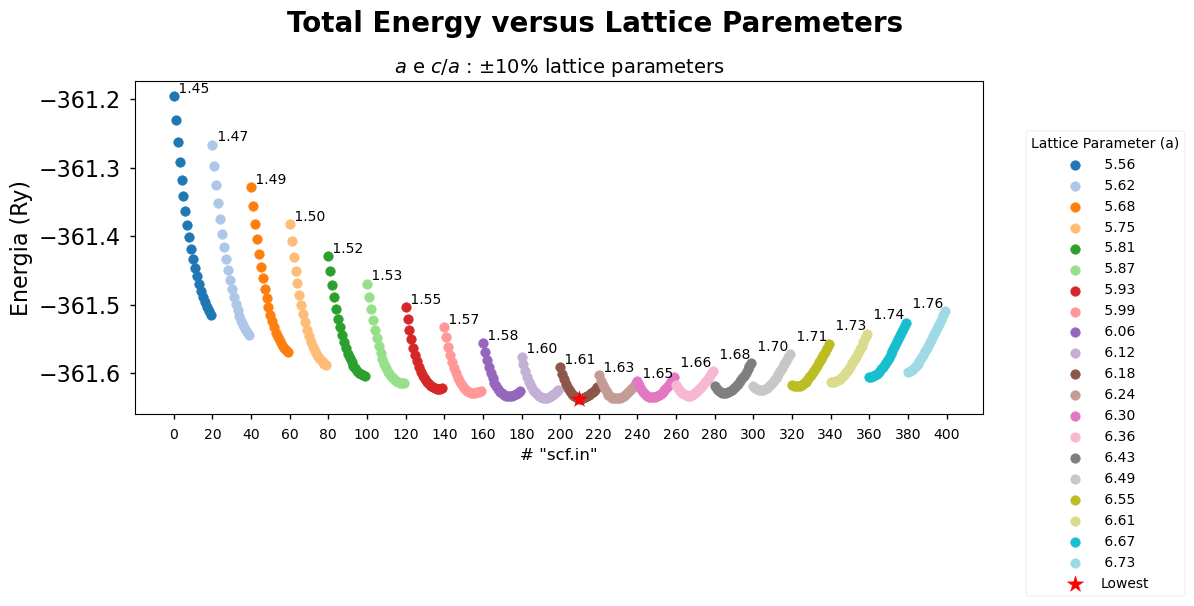

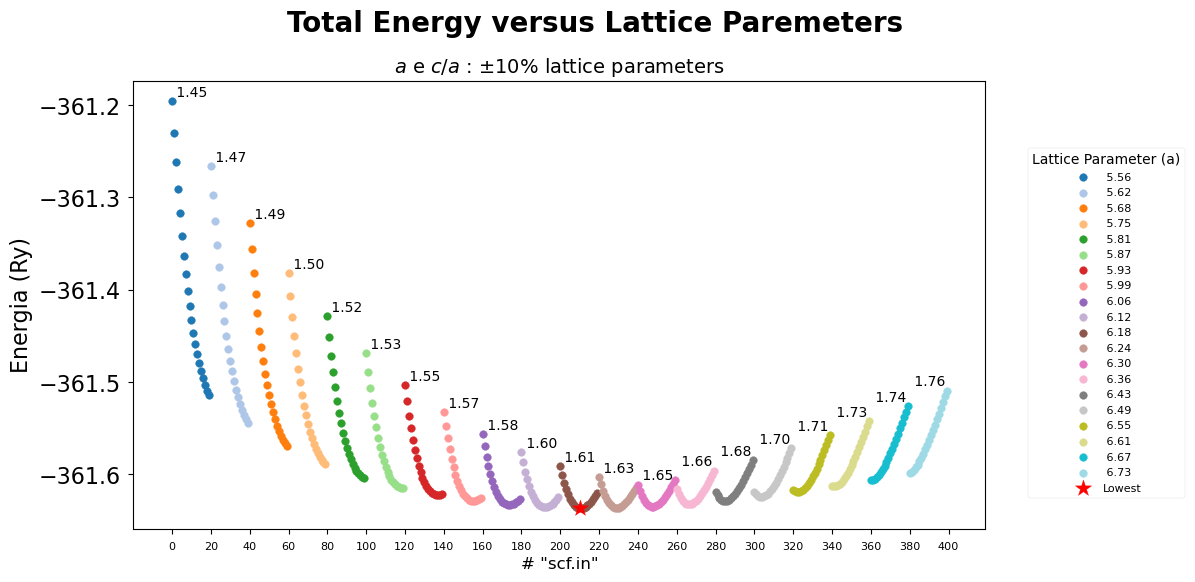

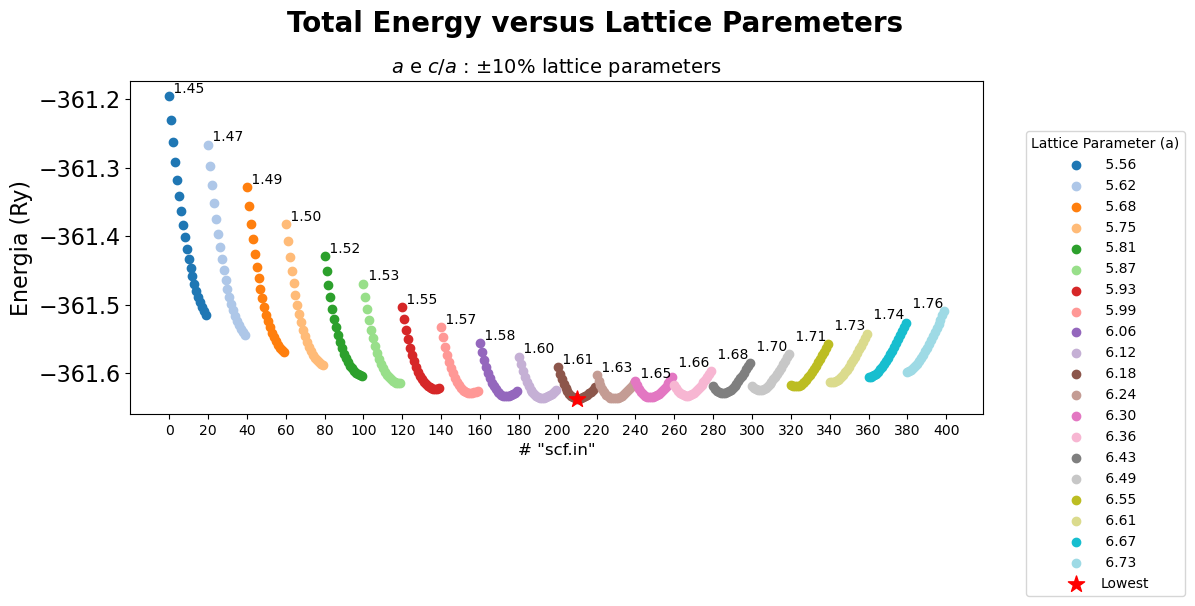

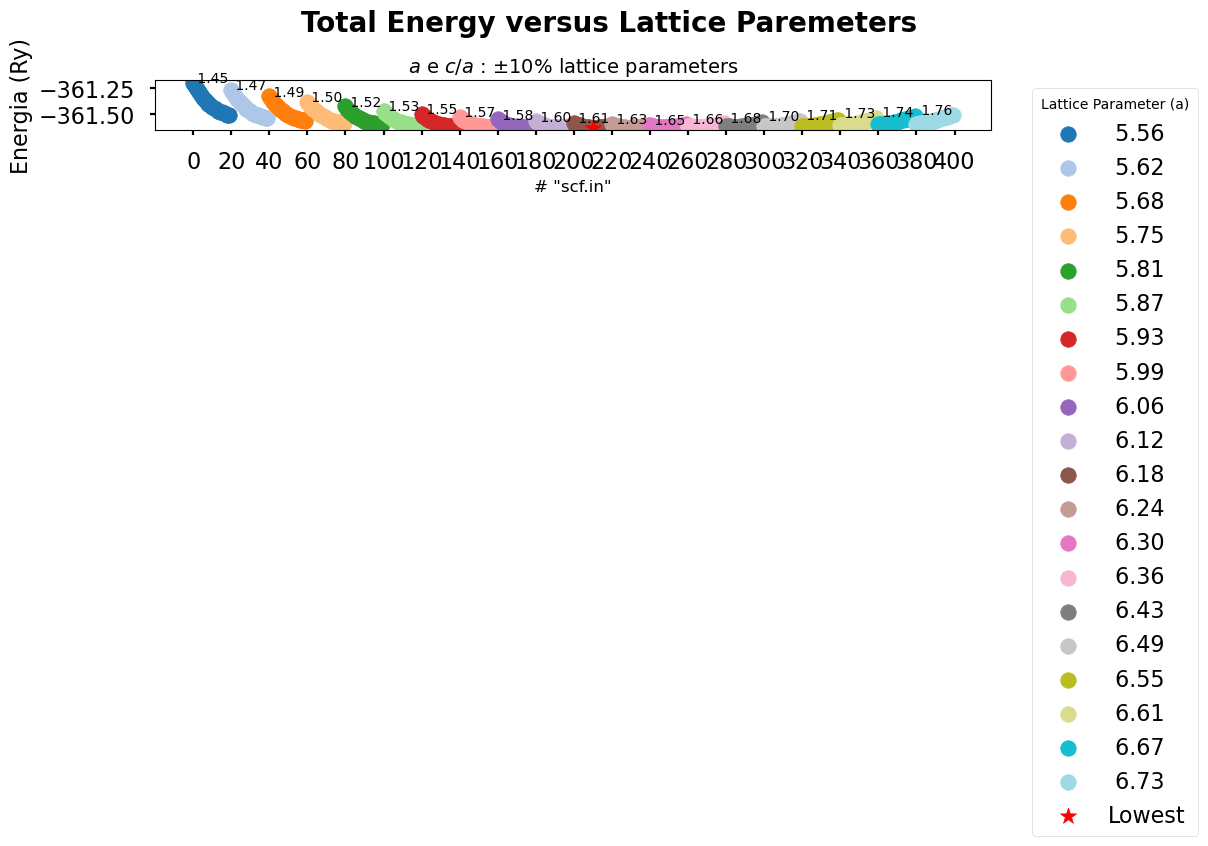

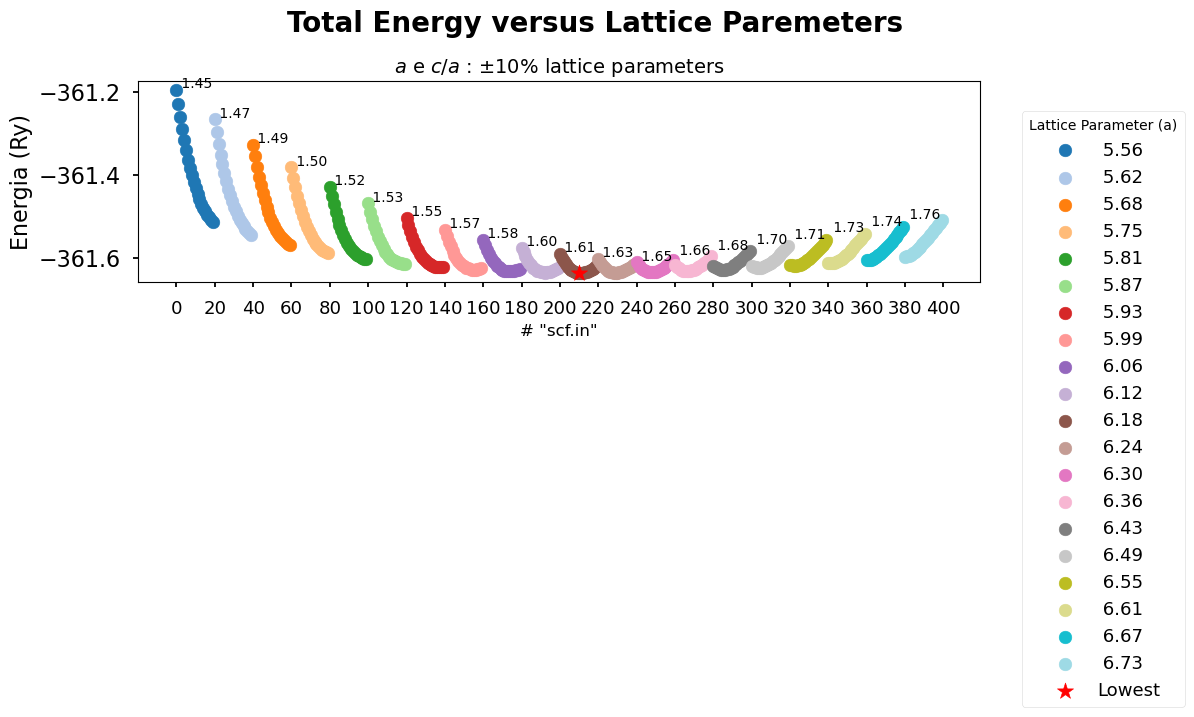

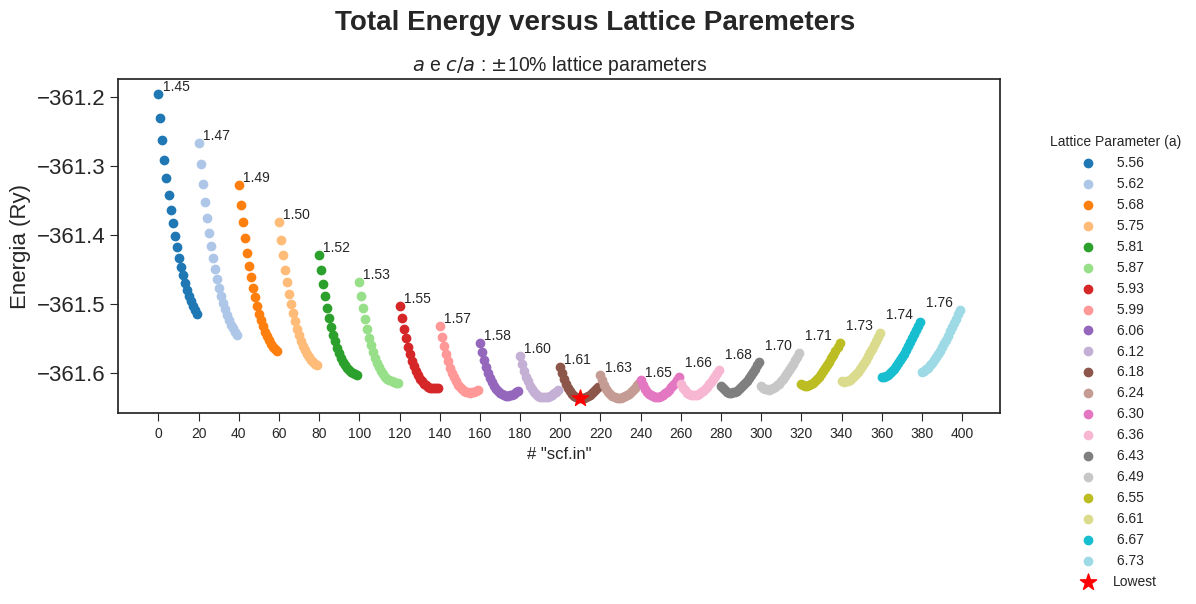

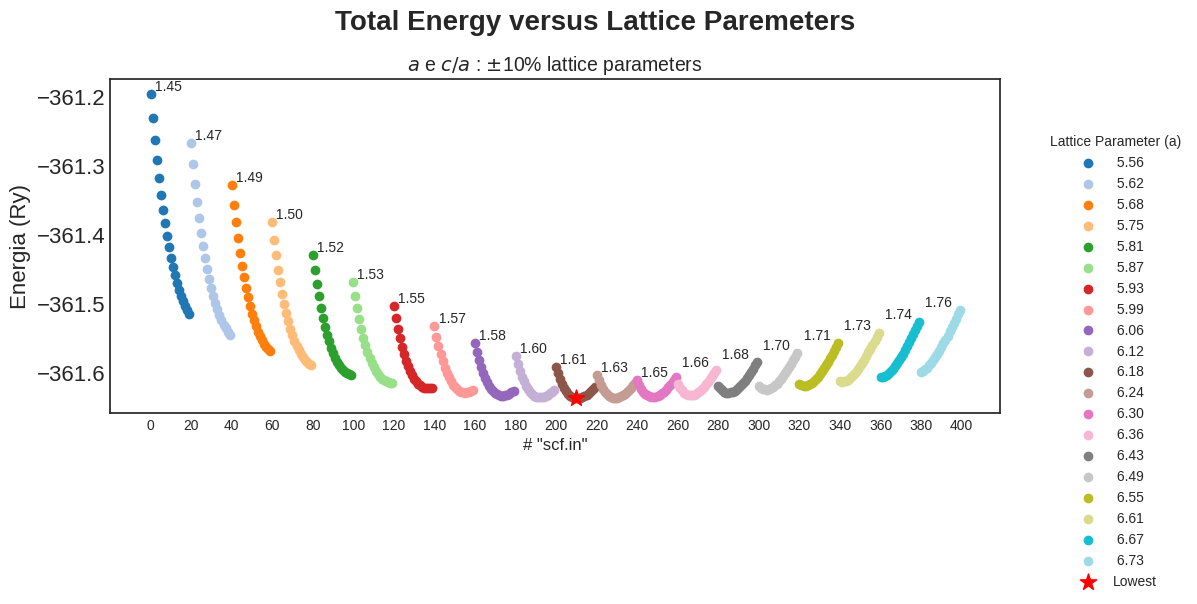

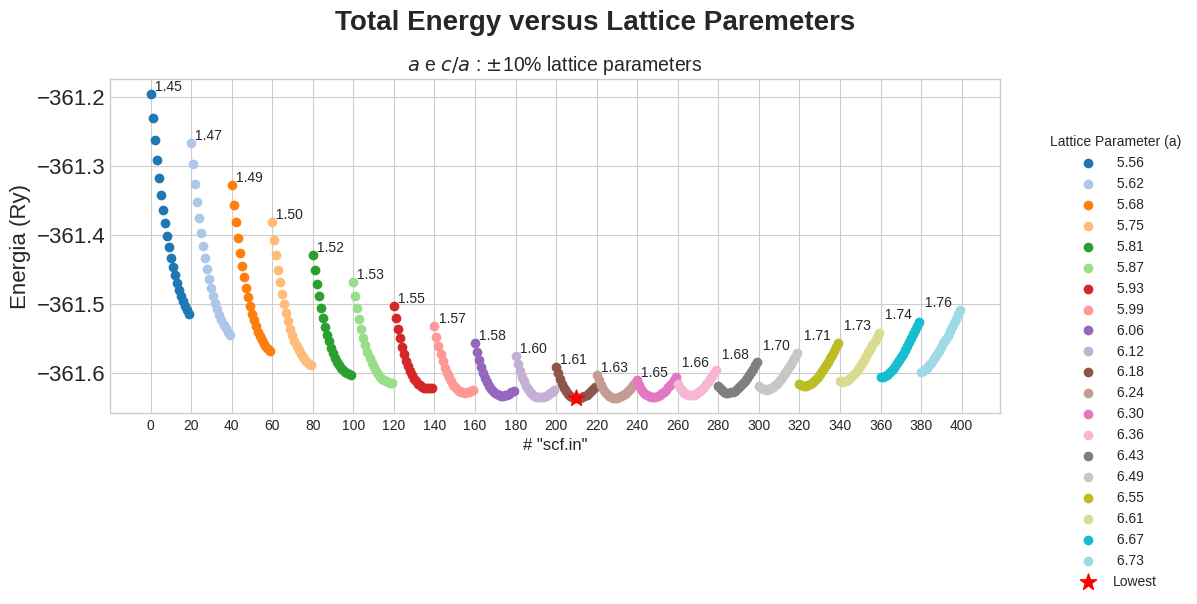

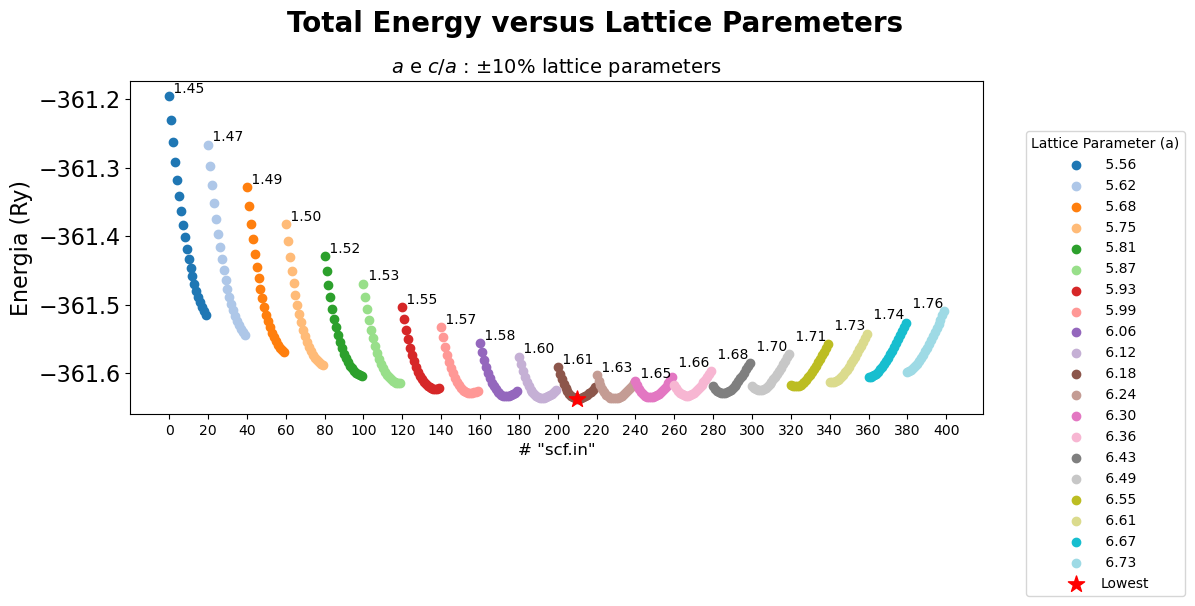

In [ ]:
# Teste de Paletas
for estilo in style.available:
    with style.context(estilo):
        fig, ax = plt.subplots(figsize=(12, 6))
        fig.suptitle('Total Energy versus Lattice Paremeters', fontsize=20, fontweight='bold')
        plt.subplots_adjust(bottom=0.3, right=0.75)

        # Definir paleta de cores
        cores = plt.cm.tab20.colors  # 20 cores distintas

        # Plotar os pontos em grupos de 20
        for i in range(0, energias.shape[0], 20):
        
            ax.scatter(
                x=range(i, min(i + 20, energias.size)),
                y=energias['Valor'].iloc[i : i + 20],
                color=cores[(i // 20) % len(cores)],
                marker='o',
                label = f' {valores_a[i//20]} '
            )

        #Escreve o valor de c/a próximo ao primeiro ponto de cada grupo
            ax.text(
            x = i+ 0.05,
            y= energias['Valor'].iloc[i] + 0.005 if i <= 240 else energias['Valor'].iloc[i+19] + 0.005,
            s = f' {valores_ca[i//20]} '
        )

        # Marcar o menor valor com estrela vermelha
        ax.scatter(
            x=energias['Valor'].idxmin(),
            y=energias['Valor'].min(),
            color='red',
            marker='*',
            s=150,
            label='Lowest'
        )

        ax.set_xticks([i for i in range(0,420,20)])
        ax.tick_params(axis='y', labelsize=16)
        ax.set_title('${a}$ e ${c/a}$ : $\\pm$10% lattice parameters', fontsize=14)
        ax.set_xlabel('# "scf.in"', fontsize=12)
        ax.set_ylabel('Energia (Ry)', fontsize=16)
        ax.legend(bbox_to_anchor=(1.05, 0.85), loc='upper left', borderaxespad=0., title='Lattice Parameter (a)') # Ajusta a posição da legend
        plt.tight_layout()
        plt.show()